In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [113]:
train = pd.read_csv('train_std.csv')
test = pd.read_csv('test_std.csv')

In [114]:
test

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,0,0.265512,Private,1.473955,Bachelors,0.914561,Never-married,Other-service,Not-in-family,White,Male,-0.163839,United-States
1,1,-0.504407,Private,-0.156035,HS-grad,-0.614396,Separated,Adm-clerical,Unmarried,White,Female,-0.163839,United-States
2,2,-0.504407,Self-emp-not-inc,0.004215,HS-grad,-0.614396,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.163839,United-States
3,3,-0.581399,Private,-0.464712,Some-college,-0.232156,Divorced,Other-service,Not-in-family,White,Female,0.658724,United-States
4,4,-1.043350,Private,1.434394,Some-college,-0.232156,Never-married,Other-service,Not-in-family,White,Male,-0.328351,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7008,7008,-0.427415,Self-emp-not-inc,-1.412726,Assoc-acdm,0.532322,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.163839,United-States
7009,7009,-0.119448,Private,2.878413,Bachelors,0.914561,Never-married,Exec-managerial,Other-relative,Black,Male,0.247443,United-States
7010,7010,-1.582294,Private,0.324610,HS-grad,-0.614396,Never-married,Other-service,Own-child,White,Male,-1.562196,United-States
7011,7011,-0.812375,State-gov,-0.606314,Bachelors,0.914561,Married-spouse-absent,Adm-clerical,Not-in-family,White,Male,-0.163839,United-States


In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16361 entries, 0 to 16360
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16361 non-null  int64  
 1   age              16361 non-null  float64
 2   workclass        16361 non-null  object 
 3   fnlwgt           16361 non-null  float64
 4   education        16361 non-null  object 
 5   educational-num  16361 non-null  float64
 6   marital-status   16361 non-null  object 
 7   occupation       16361 non-null  object 
 8   relationship     16361 non-null  object 
 9   race             16361 non-null  object 
 10  gender           16361 non-null  object 
 11  hours-per-week   16361 non-null  float64
 12  native-country   16361 non-null  object 
 13  income           16361 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 1.7+ MB


In [116]:
X = train.drop(columns=['income'])

In [117]:
train_test = pd.concat([X,test],axis = 0)

In [118]:
train_test= train_test.replace('Male',0)
train_test = train_test.replace('Female',1)

In [119]:
train_test

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,0,-1.274326,Private,1.971346,Some-college,-0.232156,Never-married,Adm-clerical,Not-in-family,White,1,-0.163839,United-States
1,1,0.188520,Private,-1.582668,Some-college,-0.232156,Married-civ-spouse,Prof-specialty,Husband,White,0,-0.163839,United-States
2,2,0.419495,Federal-gov,-0.470112,Some-college,-0.232156,Married-civ-spouse,Exec-managerial,Husband,White,0,0.494211,United-States
3,3,1.574374,?,-1.131500,HS-grad,-0.614396,Married-civ-spouse,?,Husband,White,0,-0.163839,United-States
4,4,-0.581399,Private,0.677980,Some-college,-0.232156,Married-civ-spouse,Craft-repair,Husband,White,0,-0.081583,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7008,7008,-0.427415,Self-emp-not-inc,-1.412726,Assoc-acdm,0.532322,Married-civ-spouse,Craft-repair,Husband,White,0,-0.163839,United-States
7009,7009,-0.119448,Private,2.878413,Bachelors,0.914561,Never-married,Exec-managerial,Other-relative,Black,0,0.247443,United-States
7010,7010,-1.582294,Private,0.324610,HS-grad,-0.614396,Never-married,Other-service,Own-child,White,0,-1.562196,United-States
7011,7011,-0.812375,State-gov,-0.606314,Bachelors,0.914561,Married-spouse-absent,Adm-clerical,Not-in-family,White,0,-0.163839,United-States


In [120]:
gen = train_test['gender']

In [121]:
train_test = train_test.drop(columns = ['education','Unnamed: 0','gender'])

In [122]:
train_test

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,hours-per-week,native-country
0,-1.274326,Private,1.971346,-0.232156,Never-married,Adm-clerical,Not-in-family,White,-0.163839,United-States
1,0.188520,Private,-1.582668,-0.232156,Married-civ-spouse,Prof-specialty,Husband,White,-0.163839,United-States
2,0.419495,Federal-gov,-0.470112,-0.232156,Married-civ-spouse,Exec-managerial,Husband,White,0.494211,United-States
3,1.574374,?,-1.131500,-0.614396,Married-civ-spouse,?,Husband,White,-0.163839,United-States
4,-0.581399,Private,0.677980,-0.232156,Married-civ-spouse,Craft-repair,Husband,White,-0.081583,United-States
...,...,...,...,...,...,...,...,...,...,...
7008,-0.427415,Self-emp-not-inc,-1.412726,0.532322,Married-civ-spouse,Craft-repair,Husband,White,-0.163839,United-States
7009,-0.119448,Private,2.878413,0.914561,Never-married,Exec-managerial,Other-relative,Black,0.247443,United-States
7010,-1.582294,Private,0.324610,-0.614396,Never-married,Other-service,Own-child,White,-1.562196,United-States
7011,-0.812375,State-gov,-0.606314,0.914561,Married-spouse-absent,Adm-clerical,Not-in-family,White,-0.163839,United-States


In [123]:
cat_columns = train_test.select_dtypes(include=[object]).columns


In [124]:
cat_columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'native-country'],
      dtype='object')

In [125]:
for x in cat_columns:
   
    print(x ,':', len(train[x].unique()))

workclass : 9
marital-status : 7
occupation : 15
relationship : 6
race : 5
native-country : 42


In [130]:
for i in cat_columns : 
  train_test[i] = train_test[i].replace('?',np.nan)

In [131]:
train_test = train_test.fillna(train_test.mode().iloc[0])


In [132]:
df = pd.get_dummies(train_test, columns = cat_columns)


In [133]:
df

,age,fnlwgt,educational-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.274326,1.971346,-0.232156,-0.163839,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.188520,-1.582668,-0.232156,-0.163839,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.419495,-0.470112,-0.232156,0.494211,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.574374,-1.131500,-0.614396,-0.163839,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.581399,0.677980,-0.232156,-0.081583,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7008,-0.427415,-1.412726,0.532322,-0.163839,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7009,-0.119448,2.878413,0.914561,0.247443,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7010,-1.582294,0.324610,-0.614396,-1.562196,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7011,-0.812375,-0.606314,0.914561,-0.163839,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [134]:
df = pd.concat([df,gen],axis=1)

In [135]:
from sklearn.linear_model import SGDClassifier


In [137]:
y = train['income']

In [139]:
X_train = df[:16361]
X_test = df[16361:]

In [141]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold,cross_validate
from sklearn.linear_model import SGDClassifier


In [155]:
iter = [500, 1000, 2000]
eta=  [1, 0.01, 0.00001]
alph = [0, 0.01, 0.00001]

In [221]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)


In [275]:
train_score = []
val_score = []
val_acc=[]

In [276]:
for i in range(3):
  for j in range(3):
    for k in range(3):
      sgd = SGDClassifier(loss='log', learning_rate='constant',max_iter=iter[i],eta0=eta[j],alpha=alph[k])
      scores = cross_validate(sgd,X_train,y,cv = cv , n_jobs=-1,return_train_score=True,scoring=['neg_log_loss','accuracy'])
      train_score.append(scores['train_neg_log_loss'])
      val_score.append(scores['test_neg_log_loss'])
      val_acc.append(scores['test_accuracy'])
      print('max iter : {} , eta : {} alpha : {}'.format(iter[i],eta[j],alph[k]))

max iter : 500 , eta : 1 alpha : 0
max iter : 500 , eta : 1 alpha : 0.01
max iter : 500 , eta : 1 alpha : 1e-05
max iter : 500 , eta : 0.01 alpha : 0
max iter : 500 , eta : 0.01 alpha : 0.01
max iter : 500 , eta : 0.01 alpha : 1e-05
max iter : 500 , eta : 1e-05 alpha : 0
max iter : 500 , eta : 1e-05 alpha : 0.01
max iter : 500 , eta : 1e-05 alpha : 1e-05
max iter : 1000 , eta : 1 alpha : 0
max iter : 1000 , eta : 1 alpha : 0.01
max iter : 1000 , eta : 1 alpha : 1e-05
max iter : 1000 , eta : 0.01 alpha : 0
max iter : 1000 , eta : 0.01 alpha : 0.01
max iter : 1000 , eta : 0.01 alpha : 1e-05
max iter : 1000 , eta : 1e-05 alpha : 0
max iter : 1000 , eta : 1e-05 alpha : 0.01
max iter : 1000 , eta : 1e-05 alpha : 1e-05
max iter : 2000 , eta : 1 alpha : 0
max iter : 2000 , eta : 1 alpha : 0.01
max iter : 2000 , eta : 1 alpha : 1e-05
max iter : 2000 , eta : 0.01 alpha : 0
max iter : 2000 , eta : 0.01 alpha : 0.01
max iter : 2000 , eta : 0.01 alpha : 1e-05
max iter : 2000 , eta : 1e-05 alpha : 

In [277]:
np.array(train_score).shape

(27, 10)

In [278]:
mean_train_score= np.mean(train_score,axis=1)
mean_val_score = np.mean(val_score,axis=1)

In [279]:
mean_train_score

array([-1.5625718 , -1.21318122, -1.63606824, -0.42319645, -0.43367266,
       -0.42375676, -0.47307664, -0.4759835 , -0.47307871, -1.83622582,
       -1.00430833, -1.3293349 , -0.42411054, -0.43550885, -0.42361157,
       -0.47307609, -0.47606488, -0.47307886, -1.37664133, -1.33239717,
       -1.42817969, -0.42314692, -0.43404891, -0.42338727, -0.4730761 ,
       -0.47614657, -0.47307889])

In [280]:
mean_val_score

array([-1.58324201, -1.22007622, -1.63171581, -0.42643511, -0.43547806,
       -0.42723654, -0.47350502, -0.47639591, -0.47350678, -1.86791555,
       -1.0095367 , -1.35661219, -0.42792088, -0.43661652, -0.4273415 ,
       -0.47350437, -0.4764807 , -0.47350666, -1.41016751, -1.31271089,
       -1.45341555, -0.42701382, -0.43521659, -0.42687196, -0.47350409,
       -0.47656397, -0.47350754])

In [281]:
np.argmax(mean_train_score)

21

In [282]:
np.argmax(mean_val_score)

3

In [290]:
val_mean=np.mean(val_acc,axis = 1)

In [293]:
val_mean

array([0.71098938, 0.68660195, 0.70954985, 0.80239601, 0.80043988,
       0.80147924, 0.79316665, 0.79286105, 0.79313608, 0.69271619,
       0.74103042, 0.76281979, 0.80135681, 0.80114278, 0.80202912,
       0.79313608, 0.79283049, 0.79316664, 0.73228957, 0.67165954,
       0.74310832, 0.80435167, 0.80144858, 0.80212073, 0.79313608,
       0.79283049, 0.79307496])

In [291]:
mean_acc_val = np.mean(val_mean)

In [292]:
mean_acc_val

0.7705506802990137

<ipython-input-286-a88f5d3bb086>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize =(10, 7))
<ipython-input-286-a88f5d3bb086>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize =(10, 7))
<ipython-input-286-a88f5d3bb086>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt

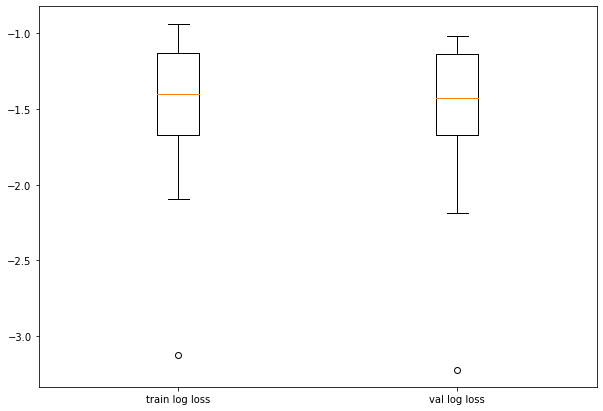

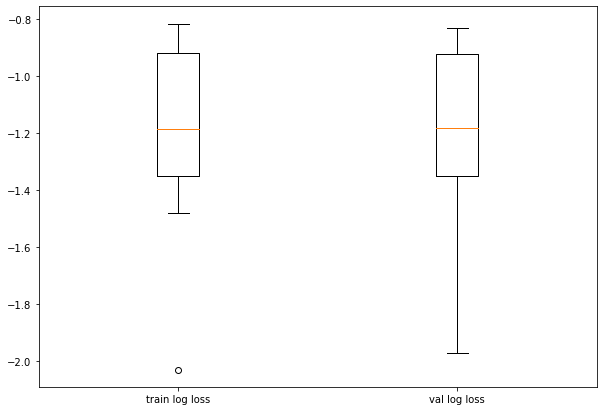

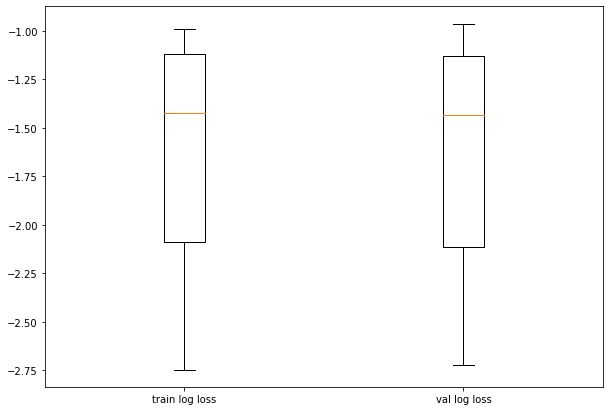

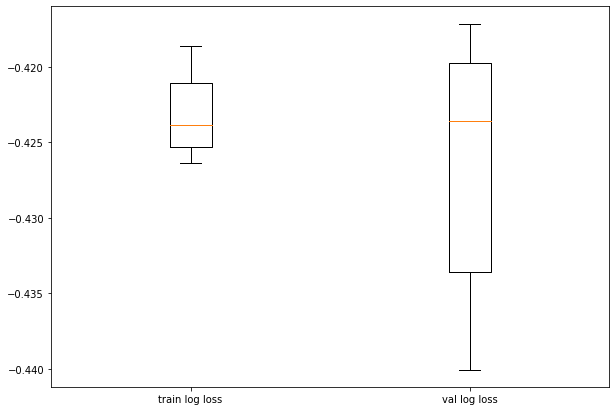

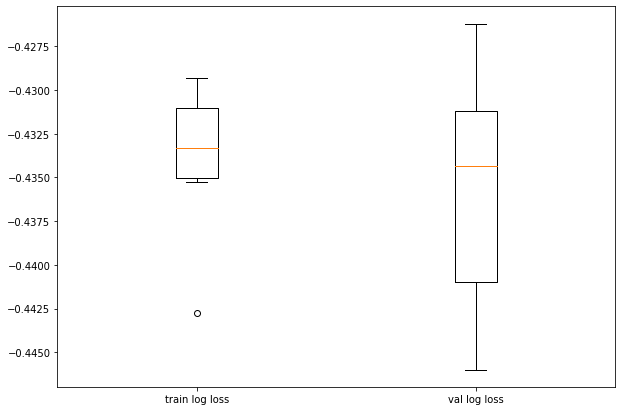

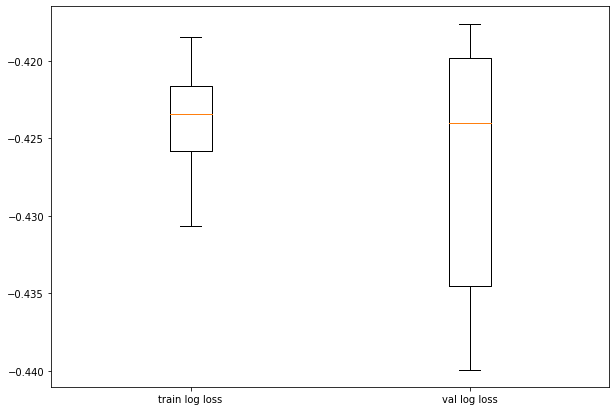

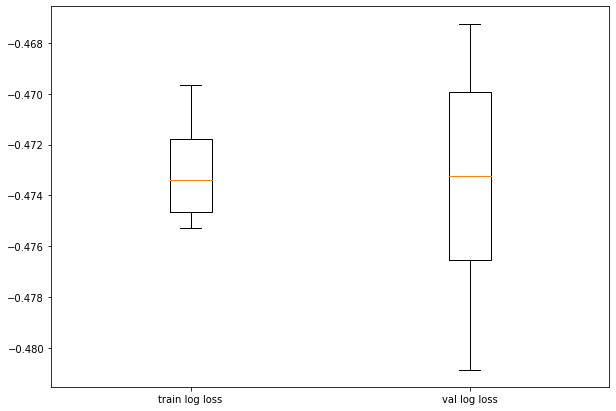

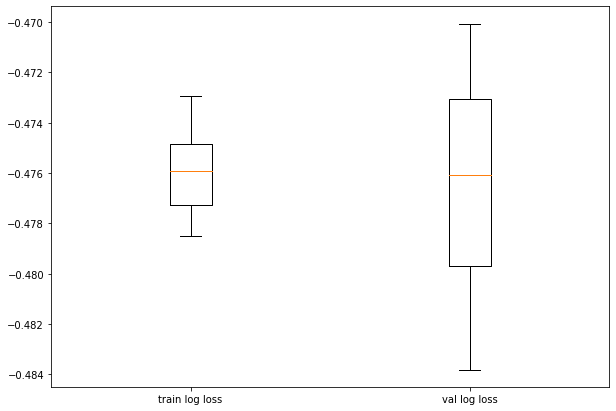

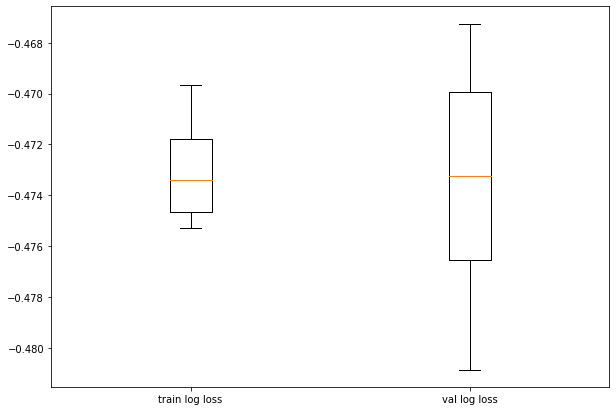

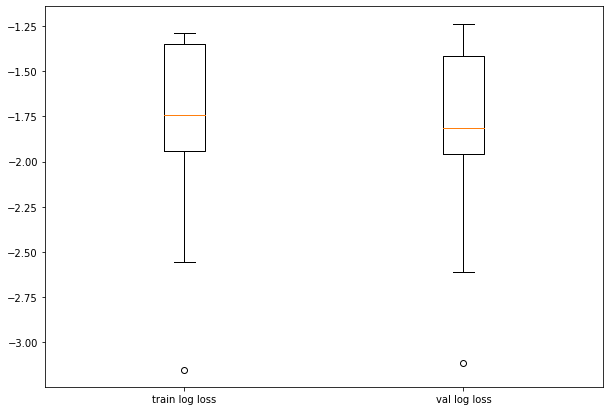

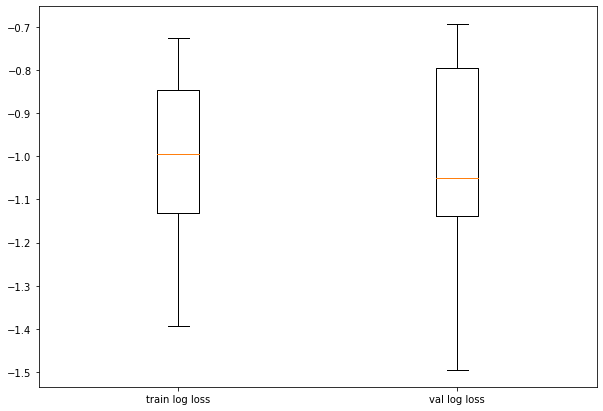

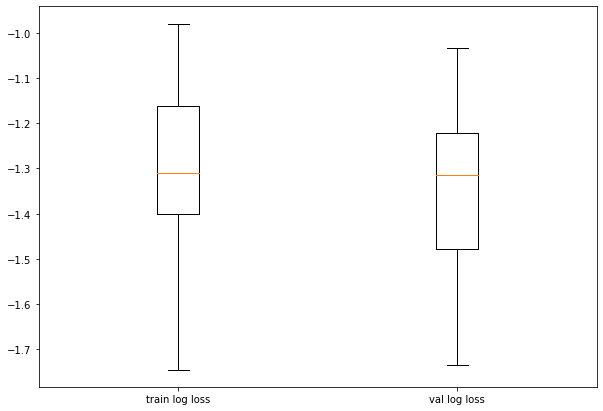

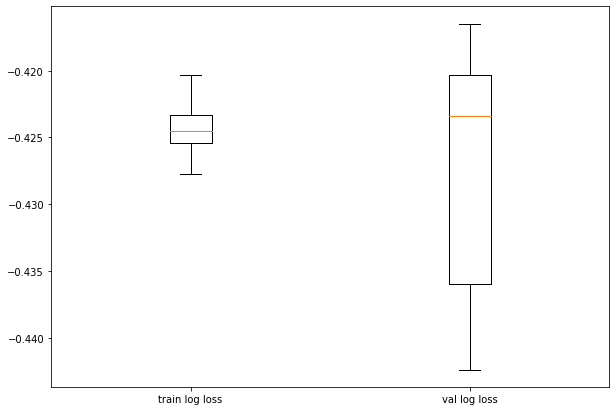

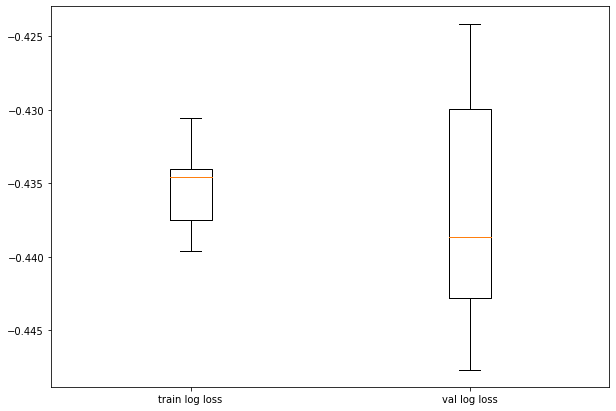

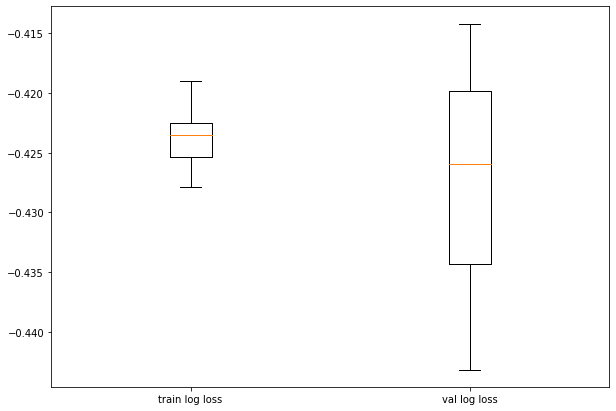

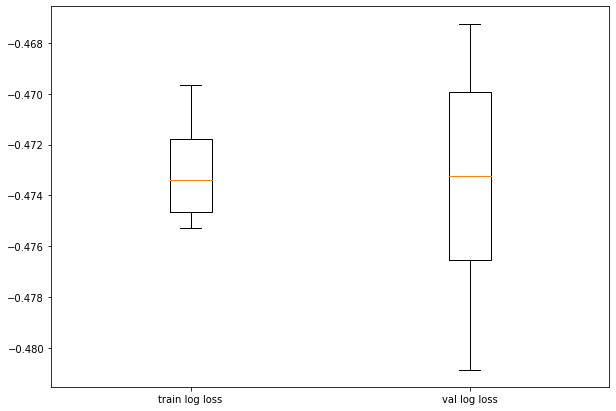

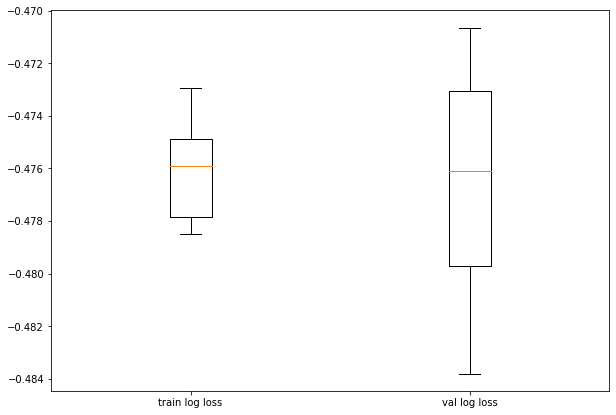

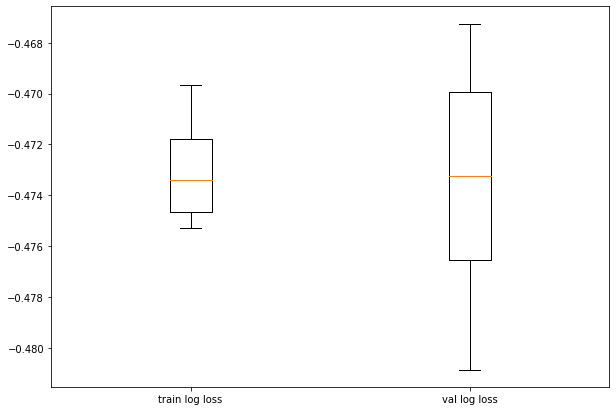

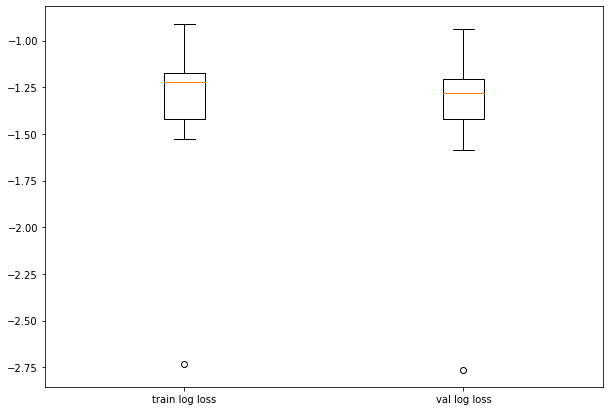

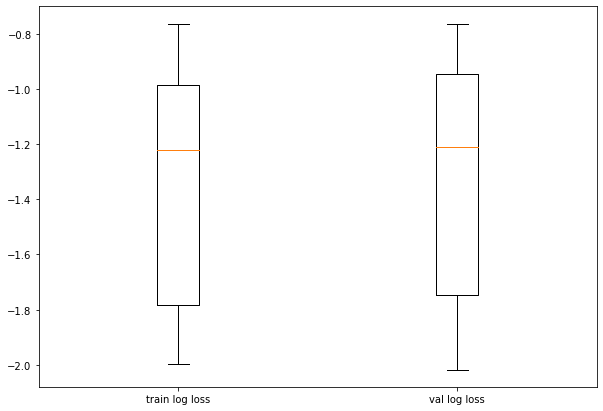

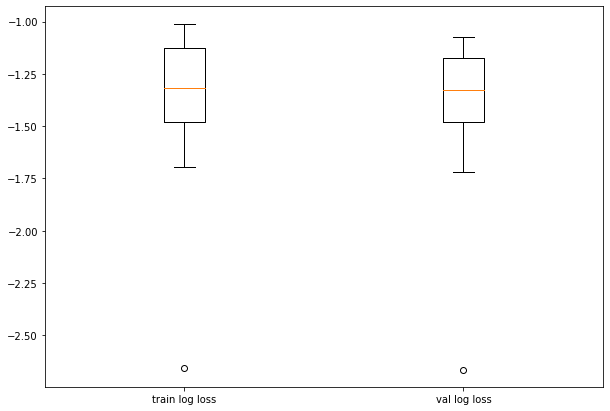

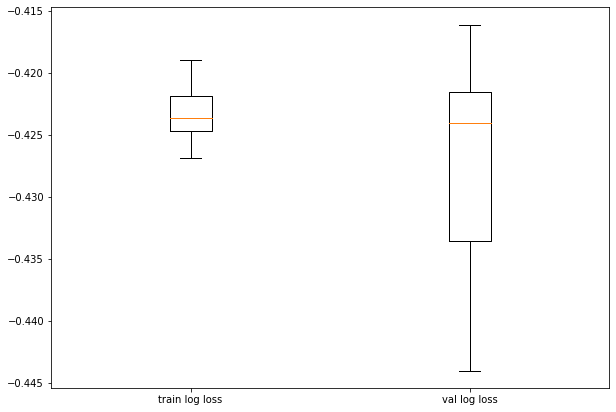

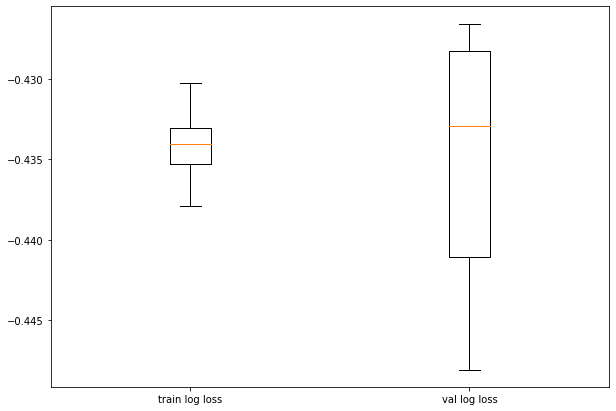

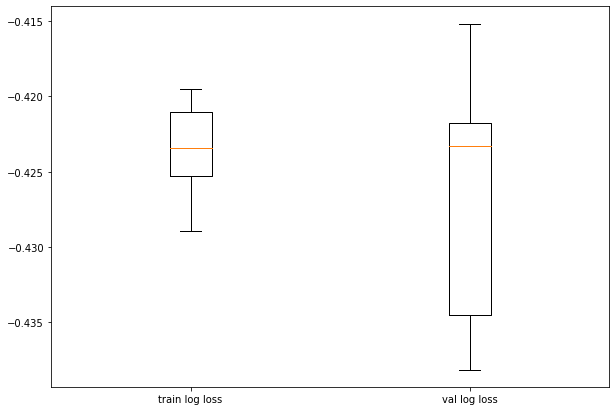

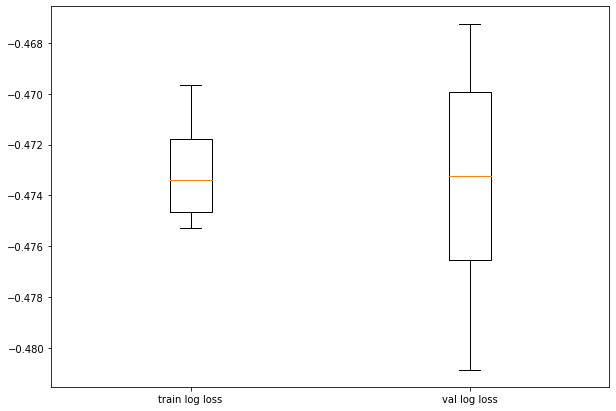

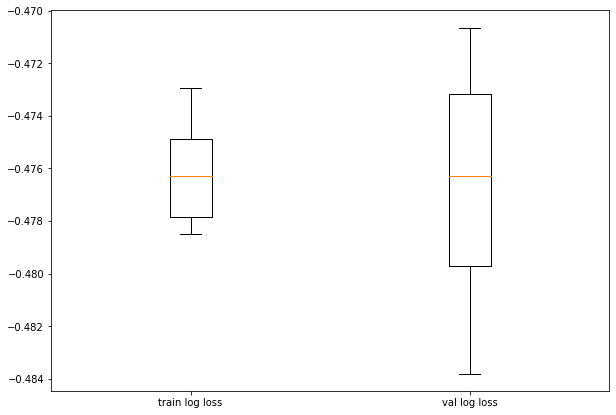

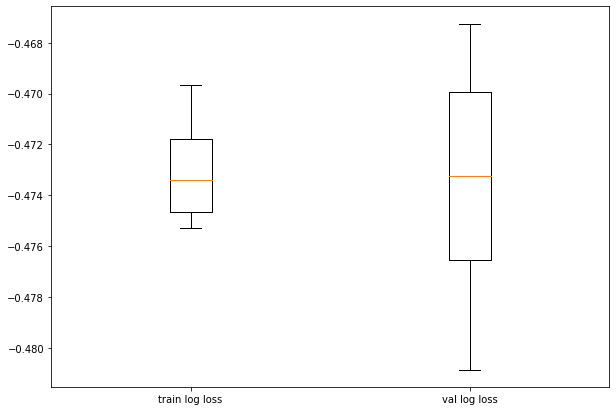

In [286]:
for i in range(np.array(train_score).shape[0]):
  fig = plt.figure(figsize =(10, 7))
  plt.boxplot(x=[train_score[i],val_score[i]],labels=("train log loss","val log loss",))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55df3ab610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55de102790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55df3abb80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55de1021f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55de102550>],
 'means': []}

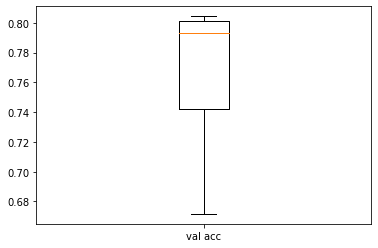

In [297]:
plt.boxplot(x=val_mean,labels = ('val acc',))

In [298]:
sgd_best = SGDClassifier(loss='log', learning_rate='constant',max_iter=500,eta0=0.01,alpha=0)


In [299]:
sgd_best.fit(X_train,y)

SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=500)

In [301]:
pred=sgd_best.predict(X_test)

In [304]:
pd.DataFrame(pred).to_csv('pred_lr.csv')